# Problem Statement : 

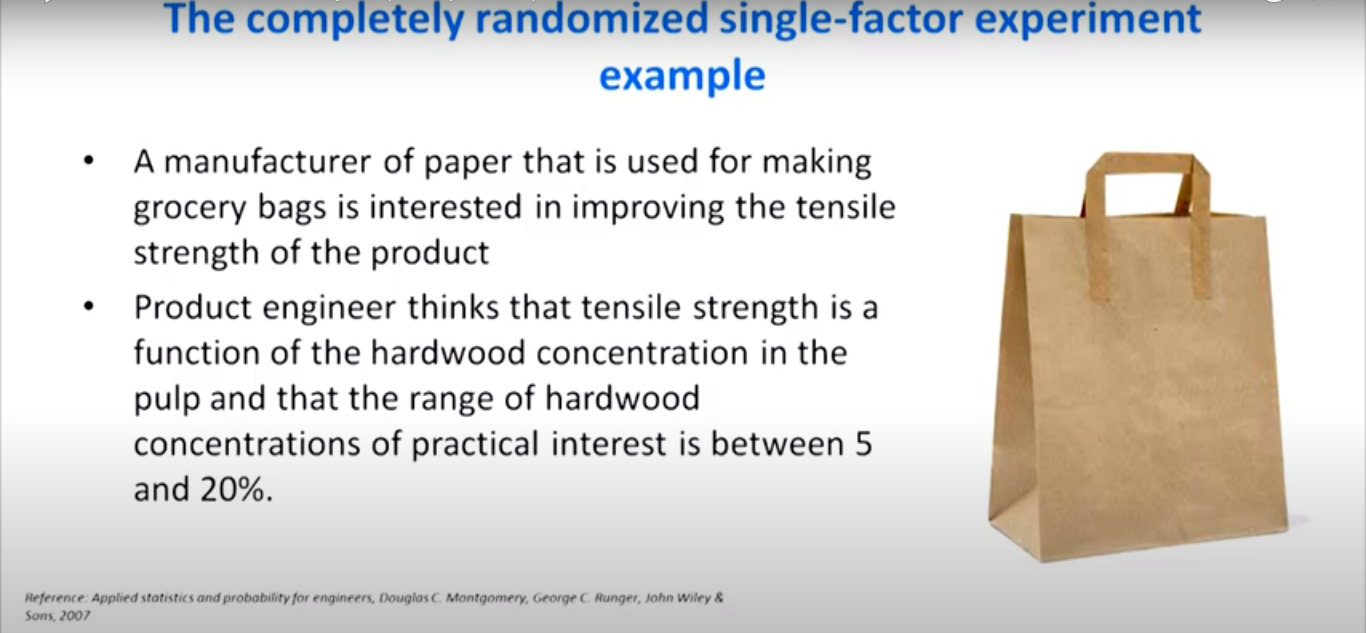

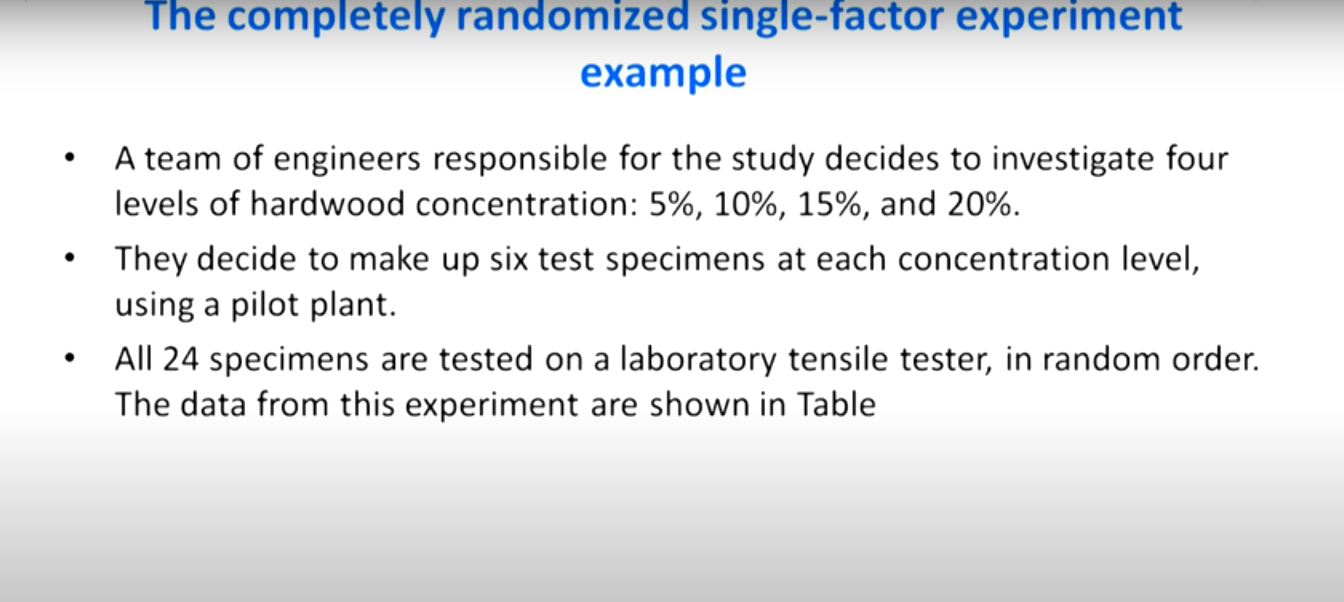

## Data:

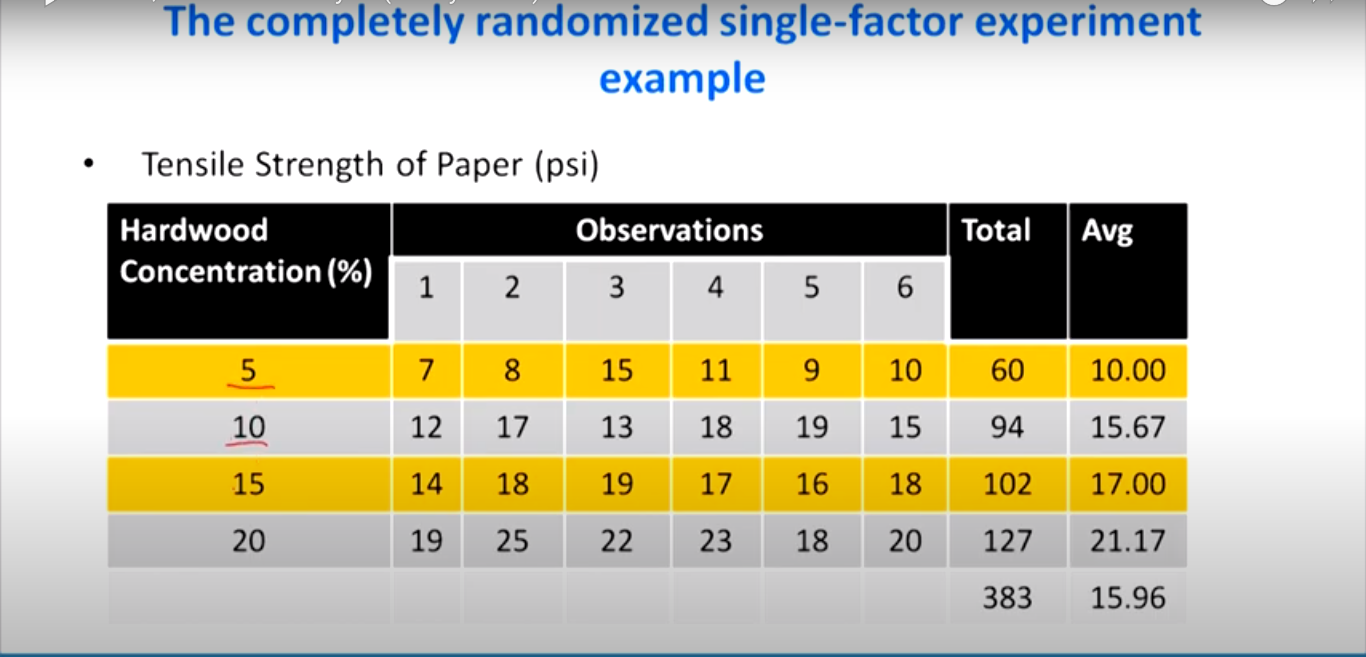

## Solution

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
path = '/home/ashish/projects/two_way_anova/Tensile strength of paper.xlsx'
data_frame = pd.read_excel(path)
data_frame

,hardwood concentration 5%,hardwood concentration 10%,hardwood concentration 15%,hardwood concentration 20%
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


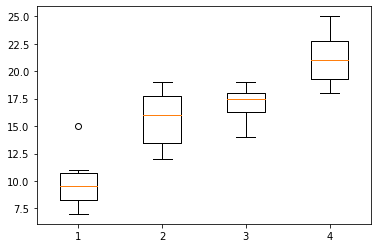

In [23]:
five_percent = np.array(data_frame['hardwood concentration 5%'])
ten_percent  = np.array(data_frame['hardwood concentration 10%'])
fifteen_percent = np.array(data_frame['hardwood concentration 15%'])
twenty_percent = np.array(data_frame['hardwood concentration 20%'])

box_plot_data = [five_percent,ten_percent,fifteen_percent,twenty_percent]
plt.boxplot(box_plot_data)
plt.show()

In [6]:
melted_data = pd.melt(data_frame.reset_index(),id_vars=['index'],value_vars=['hardwood concentration 5%','hardwood concentration 10%','hardwood concentration 15%','hardwood concentration 20%'])
melted_data.columns = ['index','treatments','value']

print(melted_data)

    index                  treatments  value
0       0   hardwood concentration 5%      7
1       1   hardwood concentration 5%      8
2       2   hardwood concentration 5%     15
3       3   hardwood concentration 5%     11
4       4   hardwood concentration 5%      9
5       5   hardwood concentration 5%     10
6       0  hardwood concentration 10%     12
7       1  hardwood concentration 10%     17
8       2  hardwood concentration 10%     13
9       3  hardwood concentration 10%     18
10      4  hardwood concentration 10%     19
11      5  hardwood concentration 10%     15
12      0  hardwood concentration 15%     14
13      1  hardwood concentration 15%     18
14      2  hardwood concentration 15%     19
15      3  hardwood concentration 15%     17
16      4  hardwood concentration 15%     16
17      5  hardwood concentration 15%     18
18      0  hardwood concentration 20%     19
19      1  hardwood concentration 20%     25
20      2  hardwood concentration 20%     22
21      3 

# Method-1 -----> With Anova table

In [8]:
## building the model
model = ols('value~C(treatments)',data=melted_data).fit()
anova_table = sm.stats.anova_lm(model,type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


In [14]:
## from anova table we have,test statistic = F0 = 19.605 

## Calculating f_alpha at alpha =0.01,numerator_degree_freedom = 3,
## denominator_degree_freedom=20

f = scipy.stats.f.ppf(1-0.01,dfn=3,dfd=20)
print("F at alpha = ",f)

F at alpha =  4.938193382310539


Say, significance level = alpha = 0.01
and p-value from anova table  = 0.000004
## 1. Using p-value approach:
        p-value < alpha      =>     Reject NULL hypothesis H0.
        
## --------------------------------------OR-------------------------------------     
## 2. Using Critical Value Approach:
If test_statistic = F0(from anova table) ≥  f_alpha_dof_num,dof_den
                                         (0.01,(4-1),(6-1)+(6-1)+(6-1)+(6-1))
                                         
Then => reject NULL Hypothesis.

# Final Decision:
Since, test statistic=F0=19.605     ≥      F_alpha_dfn_dfd = 4.938
So ==> Reject NULL Hypothesis.

## -------------------------------------------OR--------------------------------------

# Method-2 ---> Without Anova Table

In [24]:
scipy.stats.f_oneway(five_percent,ten_percent,fifteen_percent,twenty_percent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

##  p-value = 0.000004 < alpha = 0.01    

## =>  Reject NULL hypothesis H0.